In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #benzerlik skoru
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [4]:
data = pd.read_excel("World military power.xlsx")
data

#df = pd.read_excel('World military power.xlsx', header=1) bu sayede 0. satırdaki veriler 
# direk sütun ismi olarak geldi

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Ango

In [5]:
data.columns = data.iloc[0]
data.drop(index = 0 , inplace=True)
data.head()


,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.0,Angola,"16,66,000",Angola,82300.0,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
5,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,Argentina,64.0,Argentina,100.0,Argentina,0.0,Argentina,370.0,Argentina,739.0,Argentina,83.0,Argentina,172.0,Argentina,26.0,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138.0,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentin

In [6]:
l=[]
for i in range(2,59,2):
    l.append(i)
 

    

In [7]:
#data = data.drop(data.iloc[:, 2:60:2],axis = 1 , inplace= True)
data = data.drop(data.columns[l] ,axis =1 )
data
    
#df.drop(columns = df.iloc[:,1:60:2], inplace = True) tek satırda olan işlem

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
2,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
3,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
4,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
5,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,"74,50,00,000","1,00,30,00,00,000",444.0,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0,5267.0
135,Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,"5,50,00,00,000","96,58,00,00,000",45.0,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0,4616.0
136,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,"1,40,00,00,000","7,06,80,00,000",57.0,12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0,1601.0
137,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,0.0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,"4,00,00,000","11,66,00,00,000",88.0,0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",NaN,2250.0,6043.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Military Strength                        138 non-null    object
 1   Military Strength Power Index            138 non-null    object
 2   Aircraft Strength value                  138 non-null    object
 3   Fighter/Interceptor Strength value       138 non-null    object
 4   Attack Aircraft Strength value           138 non-null    object
 5   Transport Aircraft Fleet Strength value  138 non-null    object
 6   Trainer Aircraft Fleet value             138 non-null    object
 7   Helicopter Fleet Strength value          138 non-null    object
 8   Attack Helicopter Fleet Strength value   138 non-null    object
 9   Tank Strength value                      138 non-null    object
 10  AFV/APC Strength value                   138 non-null    objec

In [9]:
data = data.replace(',','', regex=True)



In [10]:
for i in range(1,31):
    a = data.columns[i]
    data[a] = data[a].astype(float)



# Clustering

In [11]:
data_clust = data["Military Strength"]
data_clust= pd.DataFrame(data_clust).reset_index()
data_clust.columns =["index","Country Name"]
del data_clust["index"]

# kümelediğimiz verilein her sütun için hangi kümeye ait olduğunu kaydettiğimiz veri seti

In [12]:
df_1 = data[["Military Strength" , "Military Strength Power Index"]]

In [13]:
df_1 = pd.get_dummies(df_1 , drop_first = True)
df_1

,Military Strength Power Index,Military Strength_Albania,Military Strength_Algeria,Military Strength_Angola,Military Strength_Argentina,Military Strength_Armenia,Military Strength_Australia,Military Strength_Austria,Military Strength_Azerbaijan,Military Strength_Bahrain,Military Strength_Bangladesh,Military Strength_Belarus,Military Strength_Belgium,Military Strength_Bhutan,Military Strength_Bolivia,Military Strength_Bosnia and Herzegovina,Military Strength_Botswana,Military Strength_Brazil,Military Strength_Bulgaria,Military Strength_Burkina Faso,Military Strength_Cambodia,Military Strength_Cameroon,Military Strength_Canada,Military Strength_Central African Republic,Military Strength_Chad,Military Strength_Chile,Military Strength_China,Military Strength_Colombia,Military Strength_Croatia,Military Strength_Cuba,Military Strength_Czechia,Military Strength_Democratic Republic of the Congo,Military Strength_Denmark,Military Strength_Dominican Republic,Military Strength_Ecuador,Military Strength_Egypt,Military Strength_El Salvador,Military Strength_Estonia,Military Strength_Ethiopia,Military Strength_Finland,Military Strength_France,Military Strength_Gabon,Military Strength_Georgia,Military Strength_Germany,Military Strength_Ghana,Military Strength_Greece,Military Strength_Guatemala,Military Strength_Honduras,Military Strength_Hungary,Military Strength_India,...,Military Strength_North Macedonia,Military Strength_Norway,Military Strength_Oman,Military Strength_Pakistan,Military Strength_Panama,Military Strength_Paraguay,Military Strength_Peru,Military Strength_Philippines,Military Strength_Poland,Military Strength_Portugal,Military Strength_Qatar,Military Strength_Republic of the Congo,Military Strength_Romania,Military Strength_Russia,Military Strength_Saudi Arabia,Military Strength_Serbia,Military Strength_Sierra Leone,Military Strength_Singapore,Military Strength_Slovakia,Military Strength_Slovenia,Military Strength_Somalia,Military Strength_South Africa,Military Strength_South Korea,Military Strength_South Sudan,Military Strength_Spain,Military Strength_Sri Lanka,Military Strength_Sudan,Military Strength_Suriname,Military Strength_Sweden,Military Strength_Switzerland,Military Strength_Syria,Military Strength_Taiwan,Military Strength_Tajikistan,Military Strength_Tanzania,Military Strength_Thailand,Military Strength_Tunisia,Military Strength_Turkey,Military Strength_Turkmenistan,Military Strength_Uganda,Military Strength_Ukraine,Military Strength_United Arab Emirates,Military Strength_United Kingdom,Military Strength_United States,Military Strength_Uruguay,Military Strength_Uzbekistan,Military Strength_Venezuela,Military Strength_Vietnam,Military Strength_Yemen,Military Strength_Zambia,Military Strength_Zimbabwe
1,1.3444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.3137,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.4659,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.8379,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.6521,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [14]:

def cluster(x,clusters):
    allscore=[]
    allclusters=[]
    sum_of_squared_distances = []
    x=x
    for i in np.arange(1,clusters):

          i+=1
          model=KMeans(n_clusters=i)
          pred=model.fit_predict(x)
          s_score = silhouette_score(x,pred)
          score=silhouette_score(x,pred)
          print("number of cluster {}, silhouette {}".format(i,score))
          allscore.append(s_score)
          allclusters.append(i)
          sum_of_squared_distances.append(model.inertia_)

    plt.plot(allclusters,sum_of_squared_distances, marker='x')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing optimal K')
    plt.show()



# Military Strength Power Index

number of cluster 2, silhouette 0.42086878279488615
number of cluster 3, silhouette 0.3075637918357614
number of cluster 4, silhouette 0.2134151686145671
number of cluster 5, silhouette 0.18509048942900463
number of cluster 6, silhouette 0.09725396009709635
number of cluster 7, silhouette 0.06741772907179139
number of cluster 8, silhouette 0.04759835971785801
number of cluster 9, silhouette 0.03746863737104697
number of cluster 10, silhouette 0.03845718170756529


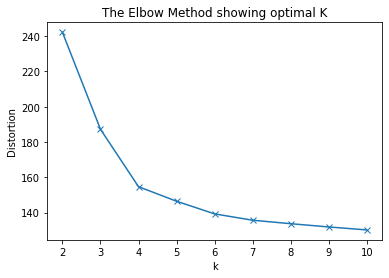

In [15]:
cluster(df_1,10)

In [16]:
model = KMeans(n_clusters = 5)

model = model.fit(df_1)

pred = model.predict(df_1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


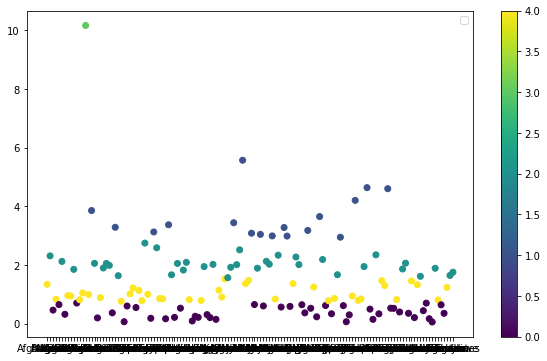

In [17]:
plt.figure(figsize = (10,6))  
plt.scatter(data["Military Strength"],df_1["Military Strength Power Index"] , c = pred)
plt.legend()
plt.colorbar()
plt.show()

In [18]:
data_clust["Military Strength Power Index"] = pred

5 olması daha mantıklı silüet skoruna göre

# Aircraft Strength Value

In [19]:
df_2 = data[["Military Strength" , "Aircraft Strength value"]]
df_2 = pd.get_dummies(df_2 , drop_first = True)


number of cluster 2, silhouette 0.9597951969296229
number of cluster 3, silhouette 0.8358045122830986
number of cluster 4, silhouette 0.7686296584684094
number of cluster 5, silhouette 0.7365982334389048
number of cluster 6, silhouette 0.6679285578961618
number of cluster 7, silhouette 0.6358698729867267
number of cluster 8, silhouette 0.628861449268385
number of cluster 9, silhouette 0.6356308034335966
number of cluster 10, silhouette 0.6378421617278089


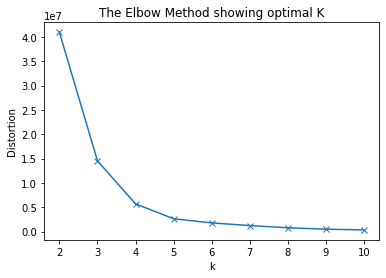

In [20]:
cluster(df_2,10)

In [21]:
model = KMeans(n_clusters = 4)

model = model.fit(df_2)

pred = model.predict(df_2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


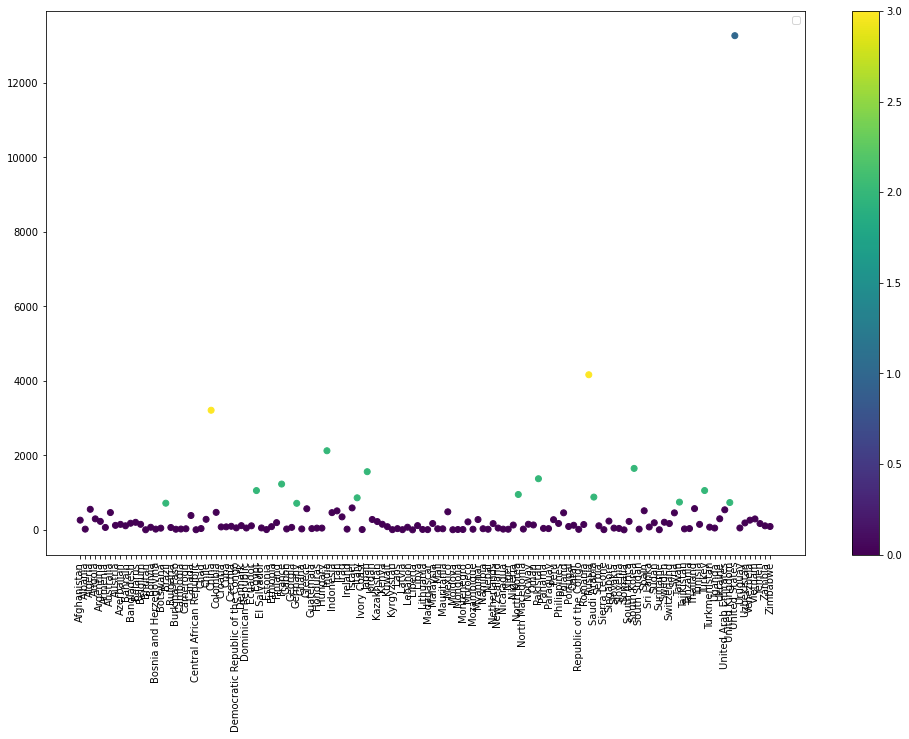

In [22]:
plt.figure(figsize = (17,10))  
plt.scatter(data["Military Strength"],df_2["Aircraft Strength value"] , c = pred)
plt.xticks(data["Military Strength"], rotation ='vertical')
plt.legend()
plt.colorbar()
plt.show()

In [23]:
data_clust["Aircraft Strength value"] = pred

In [24]:
data_clust.sample(15)

,Country Name,Military Strength Power Index,Aircraft Strength value
36,El Salvador,1,0
59,Kazakhstan,4,0
53,Ireland,2,0
33,Dominican Republic,2,0
18,Bulgaria,4,0
27,Colombia,0,0
82,Netherlands,0,0
34,Ecuador,4,0
121,Tanzania,2,0
60,Kenya,4,0


# Fighter/Interceptor Strength value

number of cluster 2, silhouette 0.9241539138668659
number of cluster 3, silhouette 0.8221052170021307
number of cluster 4, silhouette 0.8196149894287323
number of cluster 5, silhouette 0.7770615786914963
number of cluster 6, silhouette 0.6924100130557627
number of cluster 7, silhouette 0.6872370353141791
number of cluster 8, silhouette 0.6839740961638331
number of cluster 9, silhouette 0.6371455592198986
number of cluster 10, silhouette 0.6330638539821778


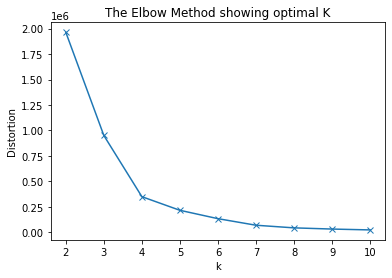

In [25]:
df_3 = data[["Military Strength" , "Fighter/Interceptor Strength value"]]
df_3 = pd.get_dummies(df_3 , drop_first = True)

cluster(df_3,10)

In [26]:
model = KMeans(n_clusters = 4)

model = model.fit(df_3)

pred = model.predict(df_3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


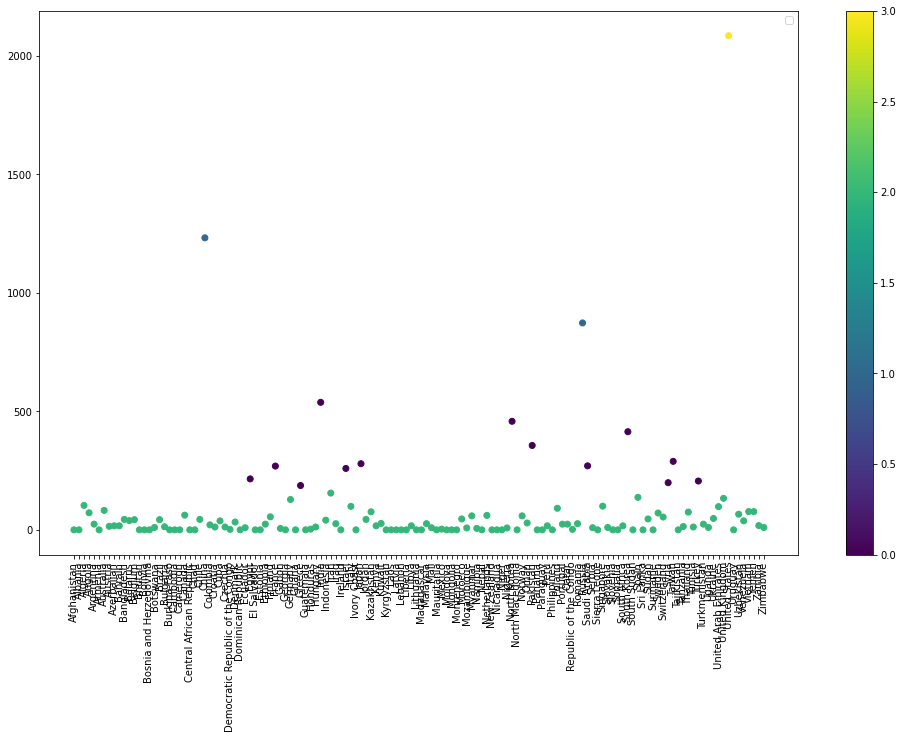

In [27]:
plt.figure(figsize = (17,10))  
plt.scatter(data["Military Strength"],df_3["Fighter/Interceptor Strength value"] , c = pred)
plt.xticks(data["Military Strength"], rotation ='vertical')
plt.legend()
plt.colorbar()
plt.show()

In [28]:
data_clust["Fighter/Interceptor Strength value"] = pred

# Tüm Sütunlar ile Clustering



Üstteki kodda sütunlardaki boş verileri doldururuz.

Daha sonra her bir sütun için yukarıda ilk 3'ünü yaptığım gibi cluster yapabilirim

Ancak şimdi tüm sütunların etkilediği bir cluster yapmak istiyorum

In [33]:
miss = data.isnull().sum()
miss[miss>0]

0
Navy Fleet Strengths value               14
Aircraft Carrier Fleet Strength value    23
Submarine Fleet Strength value           23
Destroyer Fleet Strength value           23
Frigate Fleet Strength value             23
Total Coastline Coverage value           29
Total Border Coverage value               9
dtype: int64

In [40]:
data["Navy Fleet Strengths value"].sort_values(ascending = False).value_counts()

0.0      14
8.0       5
19.0      4
20.0      4
10.0      3
18.0      3
30.0      3
40.0      3
5.0       2
48.0      2
65.0      2
64.0      2
63.0      2
57.0      2
49.0      2
38.0      2
6.0       2
112.0     2
3.0       2
12.0      2
4.0       2
75.0      2
60.0      2
116.0     1
17.0      1
33.0      1
31.0      1
234.0     1
29.0      1
28.0      1
27.0      1
26.0      1
25.0      1
246.0     1
249.0     1
282.0     1
16.0      1
37.0      1
15.0      1
285.0     1
11.0      1
292.0     1
9.0       1
316.0     1
398.0     1
453.0     1
490.0     1
603.0     1
2.0       1
36.0      1
201.0     1
103.0     1
155.0     1
100.0     1
88.0      1
87.0      1
86.0      1
80.0      1
77.0      1
117.0     1
74.0      1
69.0      1
121.0     1
149.0     1
62.0      1
39.0      1
61.0      1
777.0     1
59.0      1
173.0     1
56.0      1
55.0      1
50.0      1
180.0     1
187.0     1
41.0      1
189.0     1
984.0     1
Name: Navy Fleet Strengths value, dtype: int64

In [41]:
data["Navy Fleet Strengths value"].fillna(0 , inplace = True)

# Afganistan gibi ülkelerin verileri girilmemiş Afganistan'ın da deniz gücü olmadığı için 0 ile doldurdum

In [42]:
data["Aircraft Carrier Fleet Strength value"].sort_values(ascending = False).value_counts()

0.0     102
2.0       6
1.0       4
4.0       2
20.0      1
Name: Aircraft Carrier Fleet Strength value, dtype: int64

In [43]:
data["Aircraft Carrier Fleet Strength value"].fillna(0 , inplace = True)
# Dünyada sadece 10 ordunun uçak gemisi var



In [44]:
data["Submarine Fleet Strength value"].sort_values(ascending = False).value_counts()

0.0     74
2.0      6
6.0      6
4.0      5
5.0      4
3.0      3
8.0      3
11.0     2
9.0      1
1.0      1
83.0     1
74.0     1
12.0     1
16.0     1
20.0     1
22.0     1
34.0     1
62.0     1
66.0     1
10.0     1
Name: Submarine Fleet Strength value, dtype: int64

In [45]:
data["Submarine Fleet Strength value"].fillna(0 , inplace = True)


In [46]:
data["Destroyer Fleet Strength value"].sort_values(ascending = False).value_counts()

0.0     103
4.0       3
91.0      1
40.0      1
36.0      1
16.0      1
12.0      1
11.0      1
10.0      1
6.0       1
2.0       1
Name: Destroyer Fleet Strength value, dtype: int64

In [47]:
data["Destroyer Fleet Strength value"].fillna(0 , inplace = True)


In [48]:
data["Frigate Fleet Strength value"].sort_values(ascending = False).value_counts()

0.0     61
2.0      8
4.0      6
7.0      6
1.0      5
9.0      4
6.0      3
13.0     3
3.0      3
11.0     3
5.0      3
8.0      2
10.0     2
12.0     2
22.0     1
16.0     1
18.0     1
52.0     1
Name: Frigate Fleet Strength value, dtype: int64

In [49]:
data["Frigate Fleet Strength value"].fillna(0 , inplace = True)


In [50]:
data["Total Coastline Coverage value"].sort_values(ascending = False).value_counts()

26.0      2
400.0     2
193.0     2
225.0     2
853.0     2
         ..
3025.0    1
3208.0    1
3218.0    1
3219.0    1
0.0       1
Name: Total Coastline Coverage value, Length: 104, dtype: int64

In [53]:
data["Total Coastline Coverage value"].fillna(data["Total Coastline Coverage value"].mean() , inplace = True)

In [52]:
data["Total Border Coverage value"].sort_values(ascending = False).value_counts()

2237.0    2
1667.0    2
443.0     2
2363.0    2
2106.0    1
         ..
4783.0    1
5002.0    1
5008.0    1
5018.0    1
29.0      1
Name: Total Border Coverage value, Length: 125, dtype: int64

In [54]:
data["Total Border Coverage value"].fillna(data["Total Border Coverage value"].mean() , inplace = True)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

# Modelling

In [58]:
x = data.drop(["Military Strength"], axis=1)

In [78]:
x.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
2,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
3,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
4,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
5,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0


number of cluster 2, silhouette 0.9227153206136329
number of cluster 3, silhouette 0.899544295036163
number of cluster 4, silhouette 0.8671436271439986
number of cluster 5, silhouette 0.867519554074611
number of cluster 6, silhouette 0.7789462745536548
number of cluster 7, silhouette 0.78179475464277
number of cluster 8, silhouette 0.7847423623940257
number of cluster 9, silhouette 0.6833747949746672
number of cluster 10, silhouette 0.6795886784648318


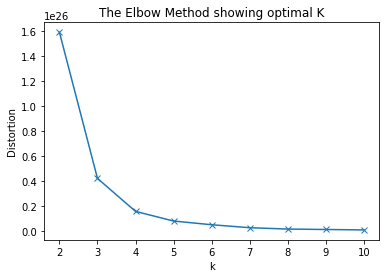

In [59]:
cluster(x,10)

In [81]:
model = KMeans(n_clusters = 4)
model = model.fit(x)
pred = model.predict(x)

In [82]:
data_clust["All columns clust"] = pred

In [83]:
silhouette_score(x,pred)

0.8671436271439986

In [84]:
data_clust

,Country Name,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,All columns clust
0,Afghanistan,4,0,2,0
1,Albania,2,0,2,0
2,Algeria,0,0,2,0
3,Angola,4,0,2,0
4,Argentina,0,0,2,0
...,...,...,...,...,...
133,Venezuela,0,0,2,0
134,Vietnam,0,0,2,0
135,Yemen,4,0,2,0
136,Zambia,2,0,2,0


In [85]:
data_clust[data_clust["Country Name"]== "Turkey"]

,Country Name,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,All columns clust
124,Turkey,0,2,0,0


Türkiye'nin girdiği clustlar

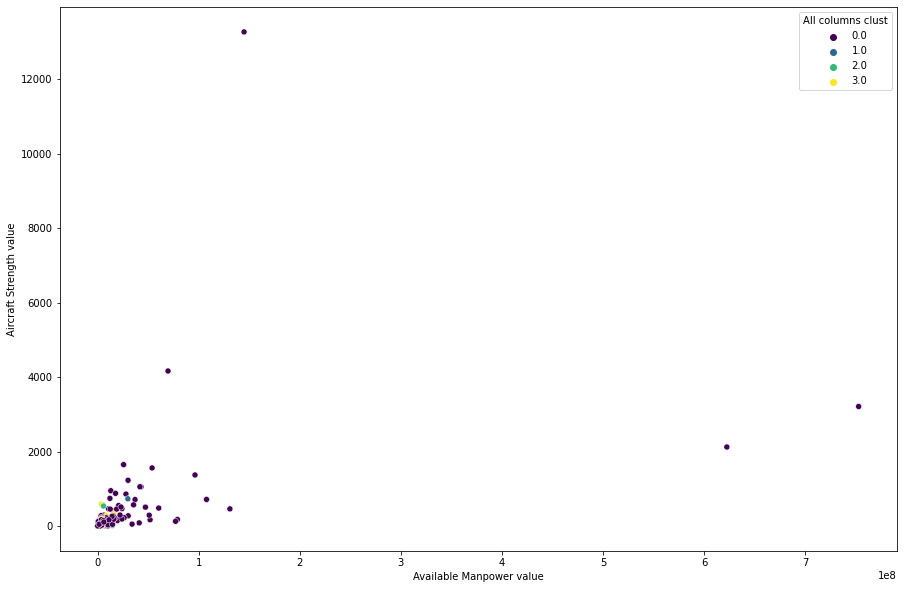

In [86]:
plt.figure(figsize=(15,10))
sns.scatterplot(x["Available Manpower value"],x["Aircraft Strength value"], hue= data_clust["All columns clust"], palette= "viridis");